# Rename me


https://weather.uwyo.edu/upperair/sounding.html

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd

In [42]:
data = pd.read_csv('./sounding.txt', header=1, delimiter='   ')

/var/folders/p8/hz449fpx6nscv0jb1klyfqb40000gp/T/ipykernel_87328/1809838415.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv('./sounding.txt', header=1, delimiter='   ')


In [88]:

read_in_data = np.array([])
num_cols = 11

with open("./sounding.txt") as file:
    for ii, item in enumerate(file):
        print(ii, item)
        
        if ii >=4:
            
            data_columns = [float(x) for x in item.split(' ') if x != '']
            
            if len(data_columns) == num_cols:
                
                read_in_data = np.append(read_in_data, data_columns)
            
        
sounding_data = np.reshape(read_in_data, (int(len(read_in_data)/num_cols), num_cols))        

0 -----------------------------------------------------------------------------

1    PRES   HGHT   TEMP   DWPT   RELH   MIXR   DRCT   SKNT   THTA   THTE   THTV

2     hPa     m      C      C      %    g/kg    deg   knot     K      K      K 

3 -----------------------------------------------------------------------------

4  1014.0         -36.9  -40.3     71   0.11     15      8  235.3  235.6  235.3

5  1003.0         -32.1  -35.0     75   0.20     31     15  240.8  241.4  240.9

6  1000.0    114  -31.3  -34.2     76   0.21     35     17  241.8  242.4  241.9

7   996.0    143  -30.6  -33.5     76   0.23     35     17  242.8  243.4  242.8

8   957.0    431  -24.1  -26.2     83   0.47     46     13  252.2  253.5  252.3

9   930.0    640  -22.9  -24.7     85   0.56     54     10  255.5  257.1  255.6

10   925.0    680  -22.9  -24.7     85   0.56     55     10  255.9  257.5  256.0

11   900.0    881  -22.9  -24.9     84   0.57     79      9  257.9  259.5  258.0

12   868.0   1147  -20.9  

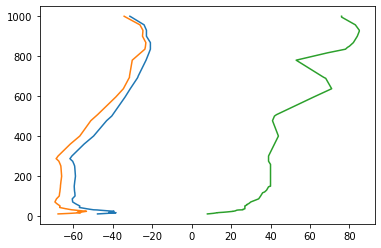

In [97]:
plt.plot(sounding_data[:,2], sounding_data[:,0])
plt.plot(sounding_data[:,3], sounding_data[:,0])
plt.plot(sounding_data[:,4], sounding_data[:,0])

In [98]:
ds = xr.open_dataset('./ERA5_sounding.nc').sel(longitude = -155, latitude = 72.0)
ds.close()

ds2 = ds.sel(time = ds.time[0])

ds2

<xarray.Dataset>
Dimensions:    (level: 37)
Coordinates:
    longitude  float32 -155.0
    latitude   float32 72.0
  * level      (level) int32 1 2 3 5 7 10 20 30 ... 850 875 900 925 950 975 1000
    time       datetime64[ns] 2013-03-01
Data variables:
    r          (level) float32 ...
    t          (level) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-02-22 23:43:44 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

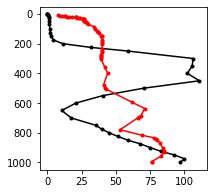

In [104]:

fig, ax = plt.subplots(figsize=(3,3))

ax.plot(ds2.r, ds2.level, marker='.', c='k')

ax.invert_yaxis()



ax.plot(sounding_data[:,4], sounding_data[:,0], marker='.', c='r')

# ax2 = ax.twiny()
# ax2.plot(ds2.t-273.15, ds2.level, c='r')

# ax.set_xlim(0,100)
# ax2.set_xlim(-40,40)